In [ ]:
#does not have to be 50:50 balancing, can be 40:60
#if the data has many dimenions, we can use the PAIR PLOT to study the data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

### Data Balancing

In this example, we use a artificial sample dataset to see how different data balancing methods affect the model and prediction.

We use balancing methods to see how our data points are classified and predicted. 
- Comare Average Accuracy and Average Balanced Accuracy
- Confusion matrix for a train-test split.
- Decision function of the classifier (in the following examples: red = minority class, gray = majority class).

In [3]:
def plot_ergebnis(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5, stratify=y) 

    plot_step = 0.02
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
        
    clf = SVC(kernel='linear')
    
    #Evaluierung anhand einer 10-fold Kreuzvalidierung
    scores = cross_validate(clf, X, y, cv=10, scoring = ('accuracy', 'balanced_accuracy'))
    print('Average Accuracy:', scores['test_accuracy'].mean())
    print('Average Balanced Accuracy:', scores['test_balanced_accuracy'].mean())

    clf.fit(X_train, y_train)
    
    fig, axs = plt.subplots(1,2, figsize = (15, 4))
    #Plot Konfussionsmatrix
    plot_confusion_matrix(clf, X_test, y_test, ax = axs[0])
    
    #Plot Entscheidungsfunktion und Datenpunkte + Vorhersagen
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.25, cmap=ListedColormap(['grey','red']))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.25, c=y, cmap=ListedColormap(['grey','red']))
    y_pred=clf.predict(X_test)
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, marker='x', s=10, cmap=ListedColormap(['grey','red']))

This is what the result of a classification for a balanced data set would look like. With a prediction accuracy of (almost) 1.

Average Accuracy: 1.0
Average Balanced Accuracy: 1.0


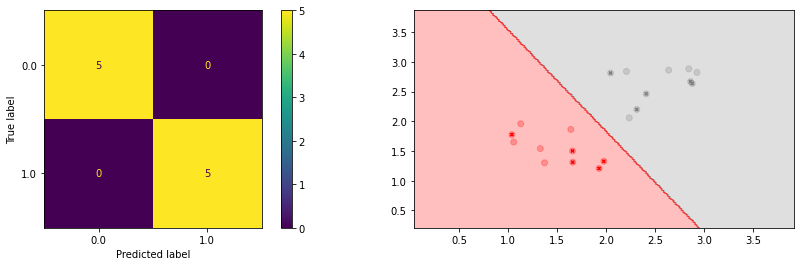

In [4]:
X_bsp = pd.DataFrame({'var1': np.append(np.ones(10)*1 + np.random.rand(10),np.ones(10)*2 + np.random.rand(10)), 
                      'var2': np.append(np.ones(10)*1 + np.random.rand(10),np.ones(10)*2 + np.random.rand(10))})
y_bsp = pd.DataFrame({'Class': np.append(np.ones(10),np.zeros(10))}).Class
plot_ergebnis(X_bsp, y_bsp)

We work with the following unbalanced data set:

In [5]:
np.random.seed(42)
X = pd.DataFrame({'var1': np.append(np.ones(10)*1 + np.random.rand(10),np.ones(100)*1.5 + np.random.rand(100)), 
                  'var2': np.append(np.ones(10)*1 + np.random.rand(10),np.ones(100)*1.5 + np.random.rand(100))})
y = pd.DataFrame({'Class': np.append(np.ones(10),np.zeros(100))}).Class

This is what the output of a classification for an unbalanced data set looks like.

Average Accuracy: 0.909090909090909
Average Balanced Accuracy: 0.5


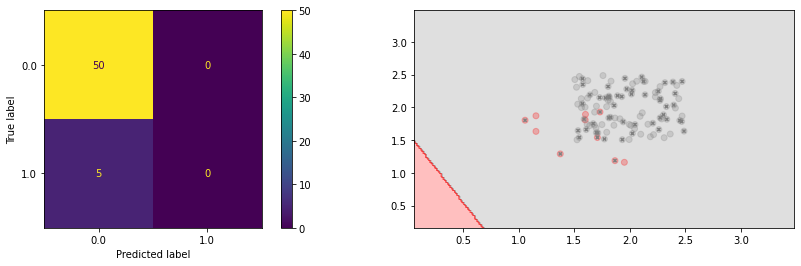

In [6]:
plot_ergebnis(X, y)

### Exercise: balance this example data set

Please note that most methods contain some random component. Therefore, run your code multiple times.

##### Extract the number of observations for class 0 / 1 (e.g. value_counts function).

In [7]:
y.value_counts(normalize=False) #True = percentage

0.0    100
1.0     10
Name: Class, dtype: int64

##### Visualize the number of observations for class True / False (e.g. value_counts + plot.bar)

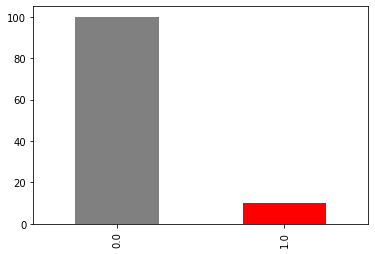

In [8]:
y.value_counts().plot.bar(color = ['grey', 'red'])
plt.show()

### Balancing the data set: 
- in each of the following subtasks, use the plot_result() function and your self-written visualization methods to observe how the balance in your dataset and the prediction result has changed.
- Furthermore, all tasks below are to be solved with functions of the imblearn module (https://imbalanced-learn.org/stable/user_guide.html#user-guide).

##### Undersampling: randomly extract data points with class 0 (majority) to achieve equilibrium.

In [9]:
from imblearn.under_sampling import RandomUnderSampler

In [10]:
rus = RandomUnderSampler()
#remove randomly

In [11]:
X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)

In [12]:
len(X_resampled_rus)

20

In [13]:
y_resampled_rus

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
Name: Class, dtype: float64

In [14]:
len(X)

110

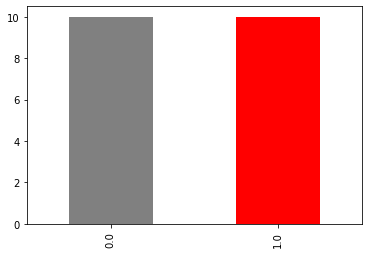

In [15]:
y_resampled_rus.value_counts().plot.bar(color = ['grey', 'red'])
plt.show()

Average Accuracy: 0.95
Average Balanced Accuracy: 0.95


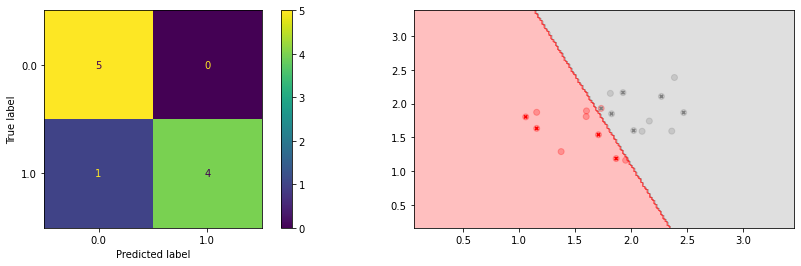

In [16]:
plot_ergebnis(X_resampled_rus, y_resampled_rus)

##### Undersampling: extract data points with class 0 (majority) using the Near Miss method to balance.

In [17]:
from imblearn.under_sampling import NearMiss
#remove the further-away points

In [18]:
nm1 = NearMiss()

In [19]:
X_resampled_nm1, y_resampled_nm1 = nm1.fit_resample(X, y)

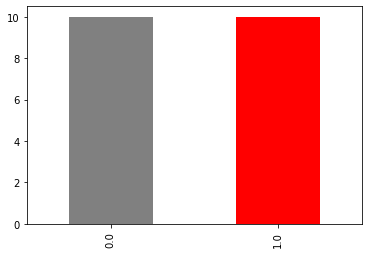

In [20]:
y_resampled_rus.value_counts().plot.bar(color = ['grey', 'red'])
plt.show()

Average Accuracy: 0.8
Average Balanced Accuracy: 0.8


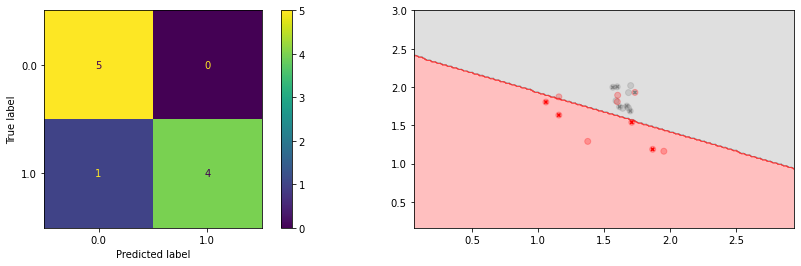

In [21]:
plot_ergebnis(X_resampled_nm1, y_resampled_nm1)

##### Undersampling: extract data points with class 0 (majority) using the Edited Nearest Neigbour method to establish equilibrium. Test different values for the n_neighbors parameter.

In [22]:
from imblearn.under_sampling import EditedNearestNeighbours

In [23]:
een = EditedNearestNeighbours(n_neighbors=10) # 3 = default, n_neighbors=15

In [24]:
X_resampled_enn, y_resampled_enn = een.fit_resample(X, y)

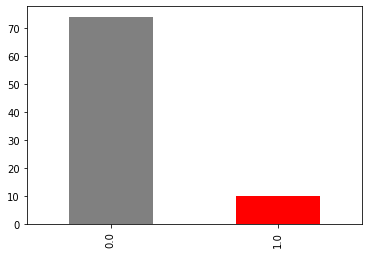

In [25]:
y_resampled_enn.value_counts().plot.bar(color = ['grey', 'red'])
plt.show()

In [26]:
y_resampled_enn.value_counts()

0.0    74
1.0    10
Name: Class, dtype: int64

Average Accuracy: 0.9416666666666667
Average Balanced Accuracy: 0.75


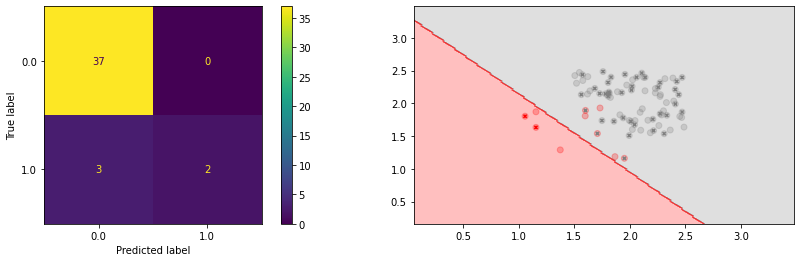

In [27]:
plot_ergebnis(X_resampled_enn, y_resampled_enn)

##### Oversampling/weighting: randomly copy data points from class 1 (minority) to create a balanc

In [28]:
from imblearn.over_sampling import RandomOverSampler
#duplicate the data points

In [29]:
ros = RandomOverSampler(random_state=0)

In [30]:
X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)

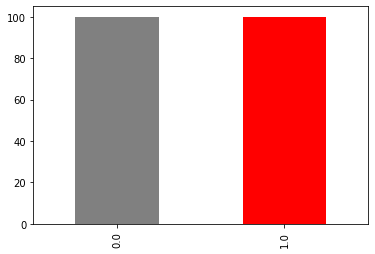

In [31]:
y_resampled_ros.value_counts().plot.bar(color = ['grey', 'red'])
plt.show()

Average Accuracy: 0.885
Average Balanced Accuracy: 0.885


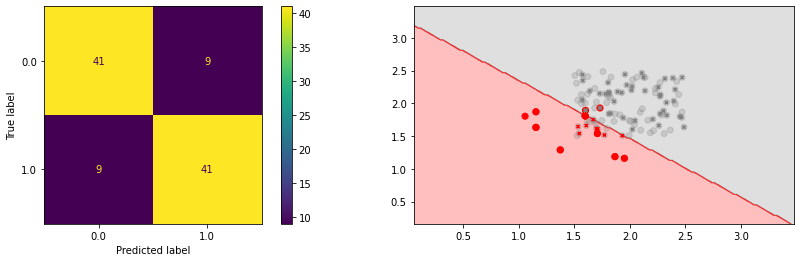

In [32]:
plot_ergebnis(X_resampled_ros, y_resampled_ros)

##### Oversampling: use SMOTE (imblearn) for class 1 (minority) to achieve balance

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smote = SMOTE()

In [35]:
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

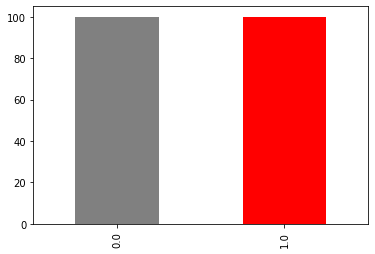

In [36]:
y_resampled_smote.value_counts().plot.bar(color = ['grey', 'red'])
plt.show()

Average Accuracy: 0.875
Average Balanced Accuracy: 0.875


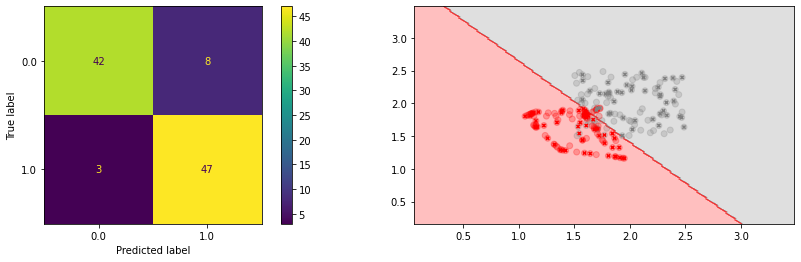

In [37]:
plot_ergebnis(X_resampled_smote, y_resampled_smote)

##### Oversampling: use ADASYN (imblearn) for class 1 (minority )to achieve balance

In [38]:
from imblearn.over_sampling import ADASYN

In [39]:
adasyn = ADASYN()

In [40]:
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X, y)

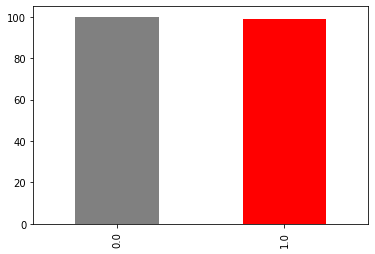

In [41]:
y_resampled_adasyn.value_counts().plot.bar(color = ['grey', 'red'])
plt.show()

Average Accuracy: 0.8794736842105262
Average Balanced Accuracy: 0.8800000000000001


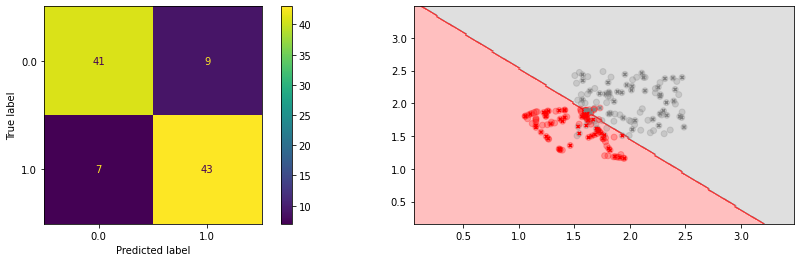

In [42]:
plot_ergebnis(X_resampled_adasyn, y_resampled_adasyn)

##### Combination: use SMOTEENN (imblearn) for the class 1 (minority) AND the 0 (majority) to create a balance

In [43]:
from imblearn.combine import SMOTEENN

#undersampling with kNN & oversampling with SMOTE at the same time

In [44]:
smoteenn = SMOTEENN()

In [45]:
X_resampled_smote_enn, y_resampled_smote_enn = smoteenn.fit_resample(X, y)

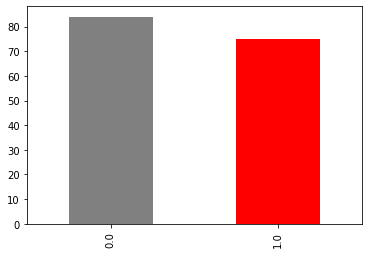

In [46]:
y_resampled_smote_enn.value_counts().plot.bar(color = ['grey', 'red'])
plt.show()

Average Accuracy: 0.9808333333333333
Average Balanced Accuracy: 0.9817460317460318


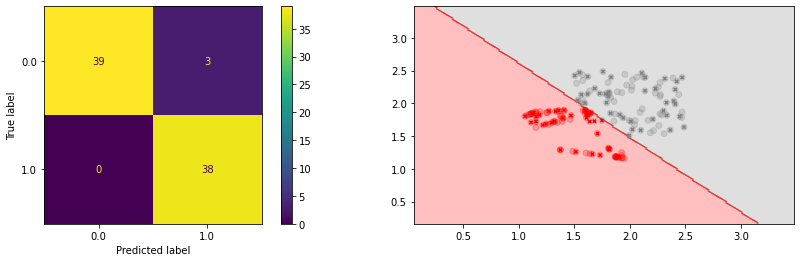

In [47]:
plot_ergebnis(X_resampled_smote_enn, y_resampled_smote_enn)

Be careful: when we eliminate records